<p style="text-align: center;"> <span style="color:skyblue"> <font size="5"> <b> CNN Neural Network - Image Classification  </b> </font> </p> </span> 
<p style="text-align: center;"> <b> <font font size="4"> By: Kofi Buahin </p> </b></font>

## Library Imports  

In [1]:
import os
import pathlib
import pickle
import warnings
warnings.filterwarnings('ignore')


#Standard Data Science Libraries
import numpy as np
import pandas as pd

#Image Processing Relevant Tools
from PIL import Image, ImageOps
from IPython.display import display

# Machine Learning Relevant Tools
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns 
plt.style.use('ggplot')
rcParams['figure.figsize'] = (18, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

Using TensorFlow backend.


## Data Pre-processing

In [2]:
dir = str(pathlib.Path().resolve())
image_classes = [folder for folder in os.listdir(dir+'/natural_images') ]
image_classes

['cat', 'dog', 'person']

In [ ]:
# dir = str(pathlib.Path().resolve())
# image_sizes = []
# for f in os.listdir(dir+'/natural_images'):
#     for picture in os.listdir(dir+'/natural_images/{}'.format(f)):
#         pic_dir = dir + '/natural_images/{}/{}'.format(f,picture)
#         pic_size = np.array(Image.open(pic_dir)).shape
#         image_sizes.append(pic_size)



We don't have images of the same size so we should rescale them. We do that using functions below

In [12]:
# Function to Process images
# def ImageProcessor(img_path):
#     img = Image.open(img_path)
#     img = ImageOps.grayscale(img)
#     img = img.resize(size=(28, 28))
#     img = np.ravel(img) / 255.0
#     return img

# def FolderProcessor(label):
#     folder = dir + '/natural_images/{}'.format(label) 
#     processed = [] # Storage container for images
#     for img in os.listdir(folder): # For every image in the directory
#         pic_dir = folder + '/{}'.format(img)
#         processed.append(ImageProcessor(pic_dir))
#     processed = pd.DataFrame(processed) # Convert to pd.DataFrame
#     processed['class'] = label # Add a class column
#     return processed



In [48]:
# Containers for Numpy Arrays of Image data.
from pandas import value_counts


y_labels = []
x_data = []
val_counts = {}

# Function to Process images
def ImageProcessor(img_path):
    img = Image.open(img_path)
    img = ImageOps.grayscale(img)
    img = img.resize(size=(28, 28))
    img = np.asarray(img)/ 255.0
    return img

# def FolderProcessor(label):
def FolderProcessor(label,lst):
    folder = dir + '/natural_images/{}'.format(label) 
    processed = [] # Storage container for images
    for img in os.listdir(folder): # For every image in the directory
        pic_dir = folder + '/{}'.format(img)
        processed.append(ImageProcessor(pic_dir))
        y_labels.append(label)  # Add a class column
    lst.append(processed) # Convert to pd.DataFrame
    return processed

#### Experimentation

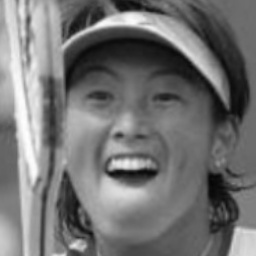

In [6]:

test = Image.open('natural_images/person/person_0123.jpg')
gray_test = ImageOps.grayscale(test)
display(gray_test)

In [ ]:
gray_resized_img = gray_test.resize(size=(28, 28))
display(gray_resized_img)

In [ ]:
np.asarray(gray_resized_img)

In [ ]:
# import cv2

# cv2.imread('natural_images/person/person_0123.jpg')
# cv2.resize(np.ravel(gray_resized_img),(28,28))

In [ ]:
import cv2

cv2.imread
cv2.resize(np.ravel(gray_resized_img),(28,28))


#### Loading Data

We can now merge all the processed data into a single dataframe here:

In [ ]:
# data = pd.concat([FolderProcessor(c) for c in image_classes])
[FolderProcessor(c, x_data) for c in image_classes]

We must now split the dataset into test and train and we must also encode the target variable class

In [50]:
# y_vars = data['class']
# X_vars = data.iloc[:,:-1]

# y_encoded = LabelEncoder().fit_transform(y_vars)
# y_categorical = to_categorical(y_encoded)

X_vars = np.concatenate(x_data, axis=0)
y_vars = np.array(y_labels)
print('X Data Shape: {}'.format(X_vars.shape))
print('Y Data Shape: {}'.format(y_vars.shape))

y_encoded = LabelEncoder().fit_transform(y_vars)
y_categorical = to_categorical(y_encoded)

X Data Shape: (2573, 28, 28)
Y Data Shape: (2573,)


In [51]:
del x_data

In [52]:
shuffle = np.arange(X_vars.shape[0])
np.random.seed(15)
np.random.shuffle(shuffle)
X = X_vars[shuffle]
# X = np.array(X_vars[shuffle])
y = y_categorical[shuffle]


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y, 
                                                    test_size = 0.25)

## Exploratory Data Analysis (If Needed)

In [54]:
# class_dist = Counter(y_labels)
# class_dist = X_vars['class'].value_counts()

# fig, ax = plt.subplots()

# p = plt.barh(class_dist.index, class_dist)
# ax.set_xlabel('Class')
# ax.set_ylabel('Count of Images')
# ax.set_title('Number Pictures in Dataset by Class')

# bar_labels = class_dist # series of label
# [ax.text(v, i, v) for i, v in enumerate(bar_labels)]

# plt.title("Number Pictures in Dataset by Class", 
#           loc= 'center',
#           fontsize = 20,
#           fontweight = 'bold',
#           pad = 20, 
#           color = 'black')

# plt.show()

***Show some random pictures selected from the training set***

In [97]:
X_train.shape[1:]

(28, 28)

## Model Building

### Iteration 1 - MLP Classifier

In [59]:
tf.random.set_seed(15)

mlp_nn = tf.keras.Sequential()
mlp_nn.add(layers.Flatten(input_shape=[28, 28]))
mlp_nn.add(layers.Dense(2048, activation='relu'))
mlp_nn.add(layers.Dense(1024, activation='relu'))
mlp_nn.add(layers.Dense(1024, activation='relu'))
mlp_nn.add(layers.Dropout(rate=0.25))
mlp_nn.add(layers.Dense(128, activation='relu'))
mlp_nn.add(layers.Dense(3, activation='softmax'))


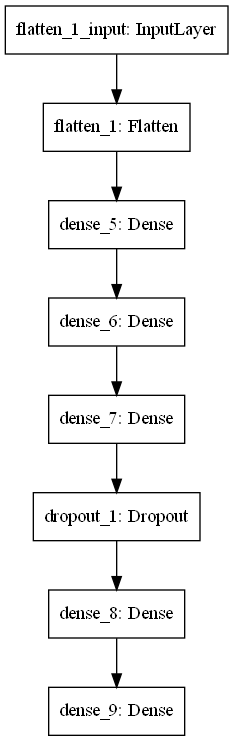

In [60]:
plot_model(mlp_nn)

In [61]:
X_train.shape

(1929, 28, 28)

In [63]:
mlp_nn.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_mlp = mlp_nn.fit(
    X_train,
    y_train,
    epochs=50,
    # batch_size=128,
    validation_split= 0.2,
    callbacks = early_stopping_cb
)

Epoch 1/50
49/49 [==============================] - 3s 59ms/step - loss: 1.0465 - accuracy: 0.6811 - val_loss: 1.0023 - val_accuracy: 0.6813
Epoch 2/50
49/49 [==============================] - 3s 54ms/step - loss: 0.8087 - accuracy: 0.7442 - val_loss: 0.6834 - val_accuracy: 0.7668
Epoch 3/50
49/49 [==============================] - 2s 50ms/step - loss: 0.6663 - accuracy: 0.7838 - val_loss: 0.6459 - val_accuracy: 0.7772
Epoch 4/50
49/49 [==============================] - 2s 50ms/step - loss: 0.6023 - accuracy: 0.7956 - val_loss: 0.6271 - val_accuracy: 0.7936
Epoch 5/50
49/49 [==============================] - 3s 52ms/step - loss: 0.5725 - accuracy: 0.8080 - val_loss: 0.6496 - val_accuracy: 0.8143
Epoch 6/50
49/49 [==============================] - 2s 50ms/step - loss: 0.5318 - accuracy: 0.8239 - val_loss: 0.5388 - val_accuracy: 0.8221
Epoch 7/50
49/49 [==============================] - 3s 51ms/step - loss: 0.5026 - accuracy: 0.8306 - val_loss: 0.5633 - val_accuracy: 0.8187
Epoch 8/50
49

In [64]:
mlp_nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

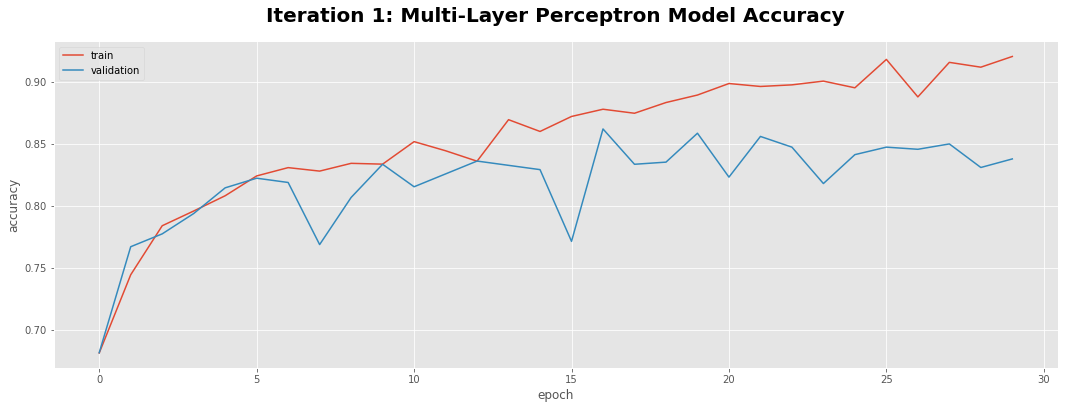

In [73]:
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title("Iteration 1: Multi-Layer Perceptron Model Accuracy", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


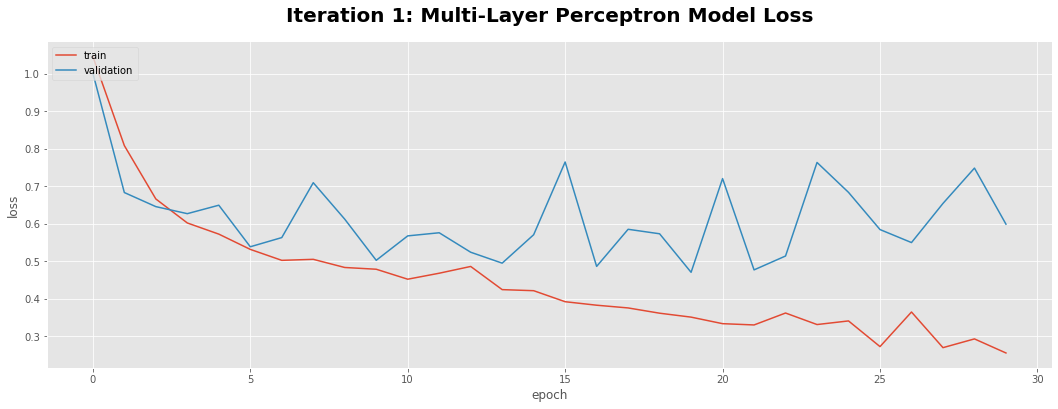

In [112]:
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title("Iteration 1: Multi-Layer Perceptron Model Loss", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [114]:
loss, accuracy = mlp_nn.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)


21/21 [==============================] - 0s 10ms/step - loss: 0.5469 - accuracy: 0.8344
Loss:  0.5469235777854919
Accuracy:  0.8343685865402222


In [115]:
y_pred = np.argmax(mlp_nn.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
round(accuracy_score(y_pred,y_test2),4)

0.7531

In [66]:
y_pred = np.argmax(mlp_nn.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       221
           1       0.59      0.54      0.56       176
           2       0.94      0.97      0.95       247

    accuracy                           0.75       644
   macro avg       0.73      0.73      0.73       644
weighted avg       0.75      0.75      0.75       644



We can see the performance (precision) on the human images is significantly better on people faces versus dogs and cats....

elaborate more here

### Iteration 2 - Basic Custom CNN Network Architecture

In [102]:
CNN_basic = keras.models.Sequential([
    keras.layers.Conv1D(64, 7, activation="relu", input_shape=X_train.shape[1:], padding="same"),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(128, 3, activation="relu",padding="same"),
    keras.layers.Conv1D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv1D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation="softmax")
])

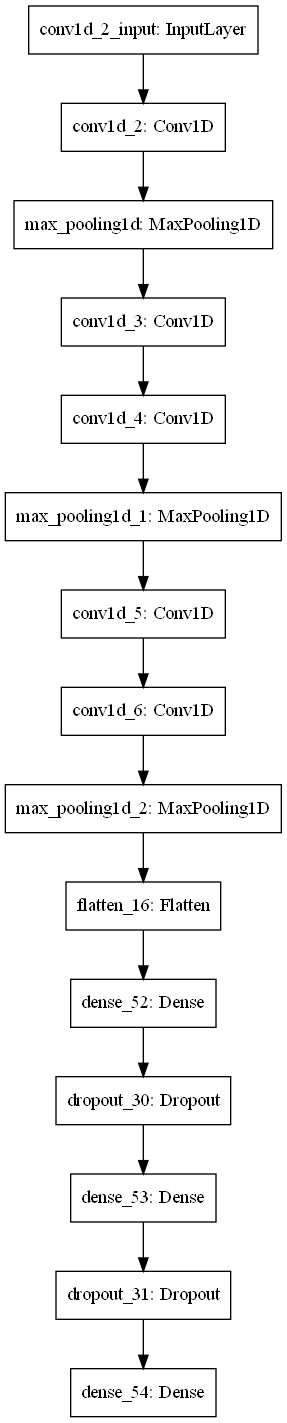

In [103]:
plot_model(CNN_basic)

In [104]:
CNN_basic.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [105]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_CNNbasic = CNN_basic.fit(
    X_train,
    y_train,
    epochs=50,
    # batch_size=128,
    validation_split= 0.2
    # callbacks = early_stopping_cb
)

Epoch 1/50
49/49 [==============================] - 2s 31ms/step - loss: 1.0665 - accuracy: 0.6779 - val_loss: 1.0336 - val_accuracy: 0.6865
Epoch 2/50
49/49 [==============================] - 2s 31ms/step - loss: 0.9523 - accuracy: 0.7237 - val_loss: 0.8641 - val_accuracy: 0.7314
Epoch 3/50
49/49 [==============================] - 1s 22ms/step - loss: 0.7782 - accuracy: 0.7544 - val_loss: 0.6695 - val_accuracy: 0.7651
Epoch 4/50
49/49 [==============================] - 1s 23ms/step - loss: 0.6357 - accuracy: 0.7829 - val_loss: 0.6919 - val_accuracy: 0.7746
Epoch 5/50
49/49 [==============================] - 1s 24ms/step - loss: 0.5873 - accuracy: 0.7876 - val_loss: 0.5703 - val_accuracy: 0.7858
Epoch 6/50
49/49 [==============================] - 1s 22ms/step - loss: 0.5487 - accuracy: 0.8069 - val_loss: 0.5663 - val_accuracy: 0.7927
Epoch 7/50
49/49 [==============================] - 1s 23ms/step - loss: 0.5153 - accuracy: 0.8114 - val_loss: 0.5211 - val_accuracy: 0.7919
Epoch 8/50
49

In [108]:
CNN_basic.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 28, 64)            12608     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 14, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 14, 128)           24704     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 14, 128)           49280     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 128)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 7, 256)            98560     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 7, 256)          

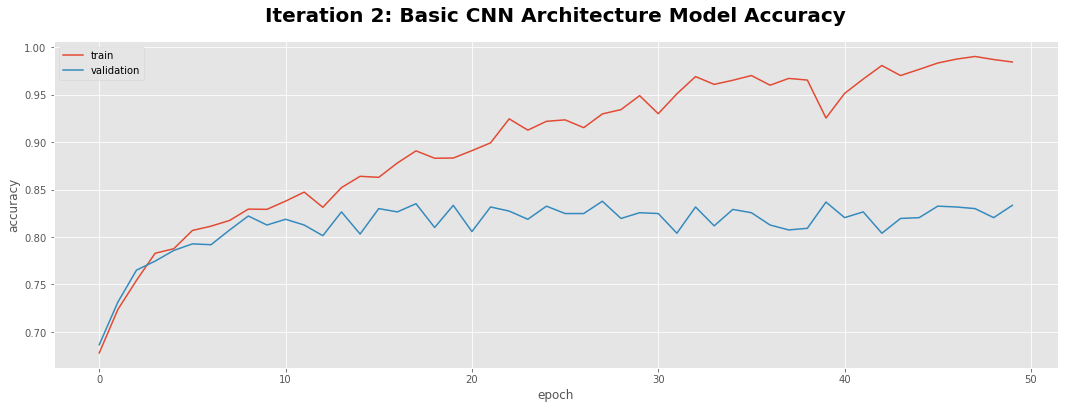

In [110]:
plt.plot(history_CNNbasic.history['accuracy'])
plt.plot(history_CNNbasic.history['val_accuracy'])
plt.title("Iteration 2: Basic CNN Architecture Model Accuracy", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

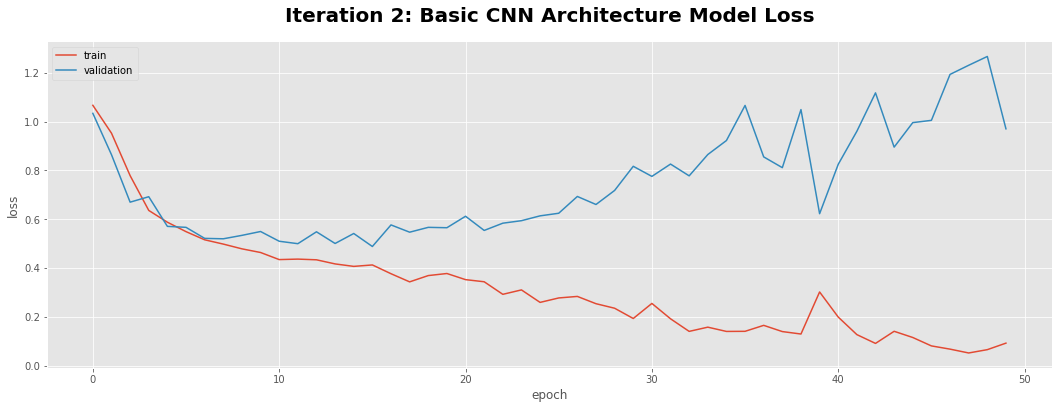

In [111]:
plt.plot(history_CNNbasic.history['loss'])
plt.plot(history_CNNbasic.history['val_loss'])
plt.title("Iteration 2: Basic CNN Architecture Model Loss", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [116]:
loss, accuracy = CNN_basic.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)


21/21 [==============================] - 0s 6ms/step - loss: 1.0799 - accuracy: 0.8328
Loss:  1.079890251159668
Accuracy:  0.8328157067298889


In [117]:
y_pred = np.argmax(CNN_basic.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
round(accuracy_score(y_pred,y_test2),4)

0.7484

In [118]:
# y_pred = np.argmax(mlp_nn.predict(X_test), axis=1)
# y_test2 = np.argmax(y_test, axis = 1)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       221
           1       0.56      0.54      0.55       176
           2       0.97      0.94      0.95       247

    accuracy                           0.75       644
   macro avg       0.73      0.73      0.73       644
weighted avg       0.75      0.75      0.75       644



### Iteration 3 - Implementing Recreation of a Popular Architecture (LeNet-5 CNN)

In [120]:
LeNet_5 = keras.models.Sequential([
    keras.layers.Conv1D(6, kernel_size=5, activation="tanh", input_shape=X_train.shape[1:], strides=1, padding="same"), #C1 Layer 
    keras.layers.AveragePooling1D(strides=2),                                                                           #S2 Layer
    keras.layers.Conv1D(16, kernel_size=5, activation="tanh", strides=1, padding="same"),                               #C3 Layer
    keras.layers.AveragePooling1D(strides=2),                                                                           #S4 Layer
    keras.layers.Conv1D(120, kernel_size=5, activation="tanh", strides=1, padding="same"),                              #C5 Layer
    keras.layers.Dense(84, activation="tanh"),                                                                          #F6 Layer
    keras.layers.Flatten(),                                                                                             #Flatten 
    keras.layers.Dense(3, activation="softmax")                                                                         #Output Layer
])

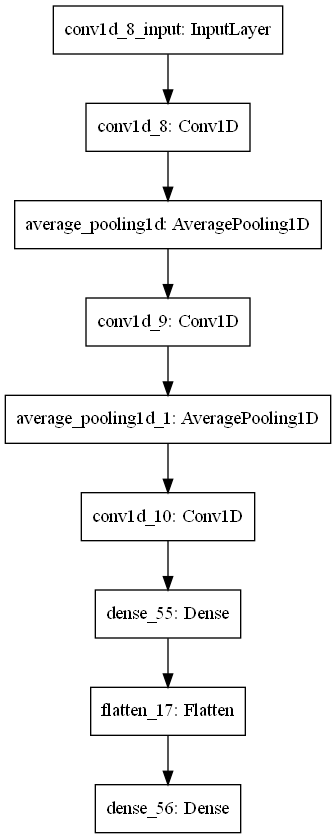

In [121]:
plot_model(LeNet_5)

In [123]:
LeNet_5.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [124]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_LeNet5 = LeNet_5.fit(
    X_train,
    y_train,
    epochs=50,
    # batch_size=128,
    validation_split= 0.2
    # callbacks = early_stopping_cb
)

Epoch 1/50
49/49 [==============================] - 1s 18ms/step - loss: 0.9216 - accuracy: 0.7243 - val_loss: 0.7214 - val_accuracy: 0.7737
Epoch 2/50
49/49 [==============================] - 0s 9ms/step - loss: 0.6472 - accuracy: 0.7965 - val_loss: 0.6206 - val_accuracy: 0.7850
Epoch 3/50
49/49 [==============================] - 1s 13ms/step - loss: 0.6020 - accuracy: 0.7969 - val_loss: 0.6022 - val_accuracy: 0.7832
Epoch 4/50
49/49 [==============================] - 0s 10ms/step - loss: 0.5703 - accuracy: 0.8069 - val_loss: 0.5668 - val_accuracy: 0.8100
Epoch 5/50
49/49 [==============================] - 1s 11ms/step - loss: 0.5673 - accuracy: 0.8153 - val_loss: 0.5488 - val_accuracy: 0.8092
Epoch 6/50
49/49 [==============================] - 0s 10ms/step - loss: 0.5469 - accuracy: 0.8220 - val_loss: 0.5394 - val_accuracy: 0.8100
Epoch 7/50
49/49 [==============================] - 0s 9ms/step - loss: 0.5361 - accuracy: 0.8203 - val_loss: 0.5258 - val_accuracy: 0.8178
Epoch 8/50
49/4

In [125]:
LeNet_5.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 28, 6)             846       
_________________________________________________________________
average_pooling1d (AveragePo (None, 14, 6)             0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 14, 16)            496       
_________________________________________________________________
average_pooling1d_1 (Average (None, 7, 16)             0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 7, 120)            9720      
_________________________________________________________________
dense_55 (Dense)             (None, 7, 84)             10164     
_________________________________________________________________
flatten_17 (Flatten)         (None, 588)             

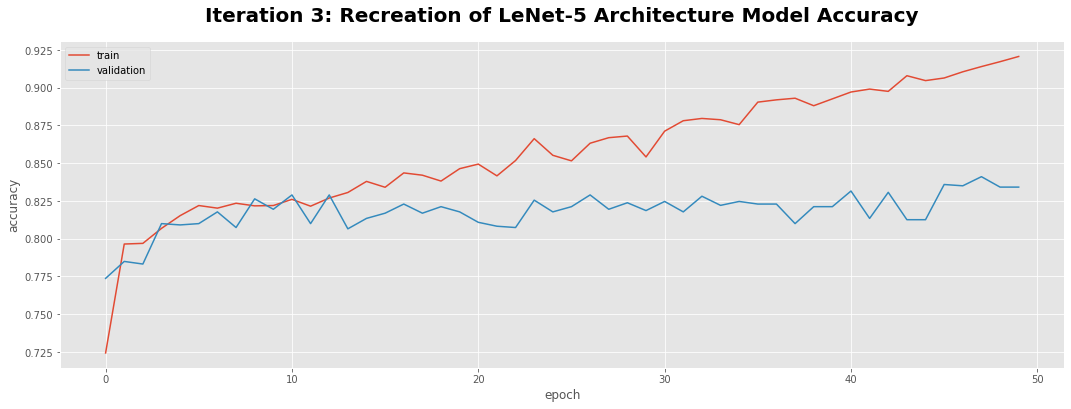

In [126]:
plt.plot(history_LeNet5.history['accuracy'])
plt.plot(history_LeNet5.history['val_accuracy'])
plt.title("Iteration 3: Recreation of LeNet-5 Architecture Model Accuracy", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

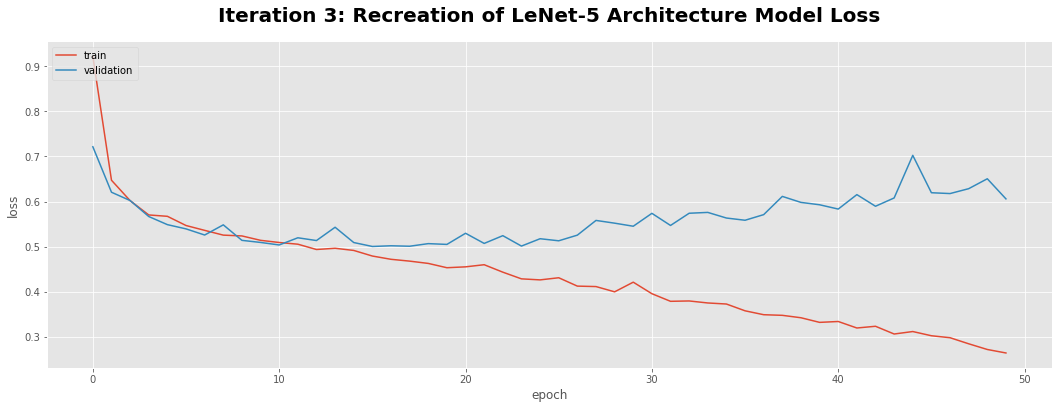

In [127]:
plt.plot(history_LeNet5.history['loss'])
plt.plot(history_LeNet5.history['val_loss'])
plt.title("Iteration 3: Recreation of LeNet-5 Architecture Model Loss", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [130]:
loss, accuracy = LeNet_5.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)

21/21 [==============================] - 0s 3ms/step - loss: 0.5950 - accuracy: 0.8370
Loss:  0.595038115978241
Accuracy:  0.8369565010070801


In [131]:
y_pred = np.argmax(LeNet_5.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
round(accuracy_score(y_pred,y_test2),4)

0.7516

In [132]:
y_pred = np.argmax(LeNet_5.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       221
           1       0.60      0.53      0.56       176
           2       0.94      0.94      0.94       247

    accuracy                           0.75       644
   macro avg       0.73      0.73      0.73       644
weighted avg       0.75      0.75      0.75       644



### Iteration 4 - Using Pre-trained Popular Network (LeNet-5 CNN)